In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
df1 = pd.read_csv(r'C:\Users\avata\Desktop\New folder\ML\Class Activity 2\heart_failure_clinical_records.csv')

df = df1.copy()

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
df.duplicated().sum()

3680

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
# df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

3680

In [11]:
# df = df[df['smoking'] != 0]

In [12]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


<Axes: ylabel='age'>

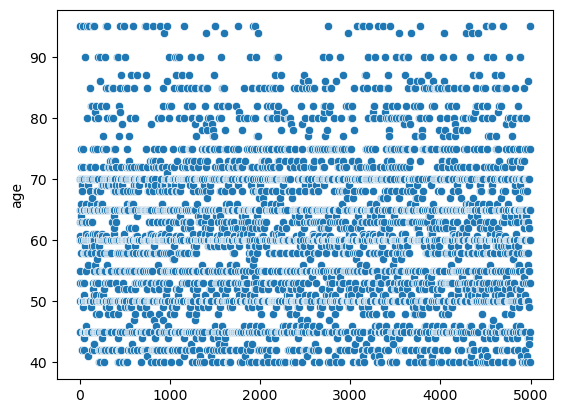

In [13]:
sns.scatterplot(data = df['age'])

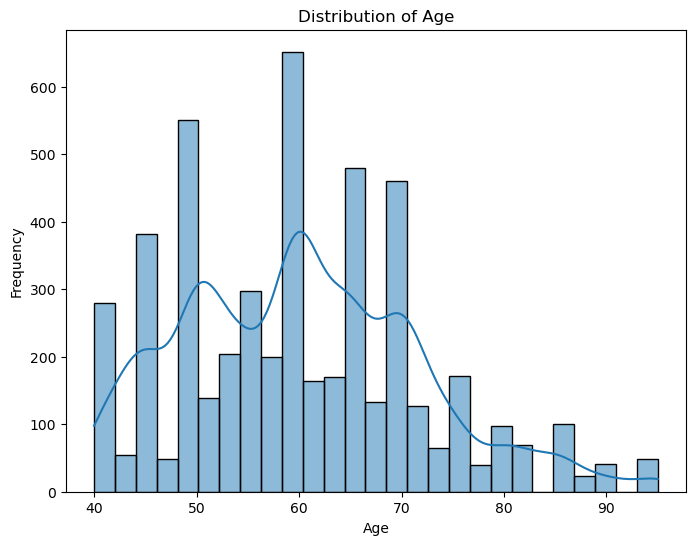

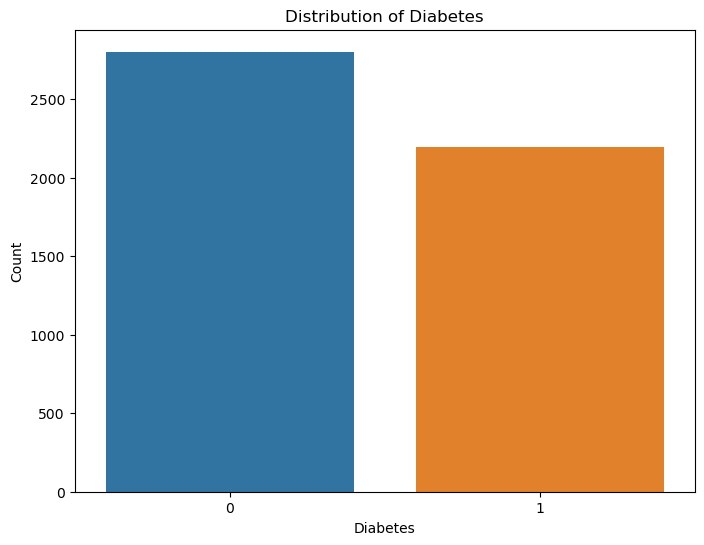

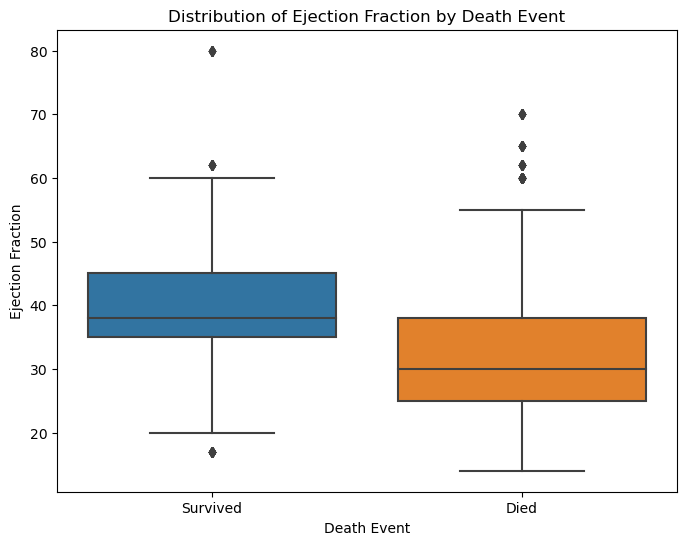

C:\Users\avata\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


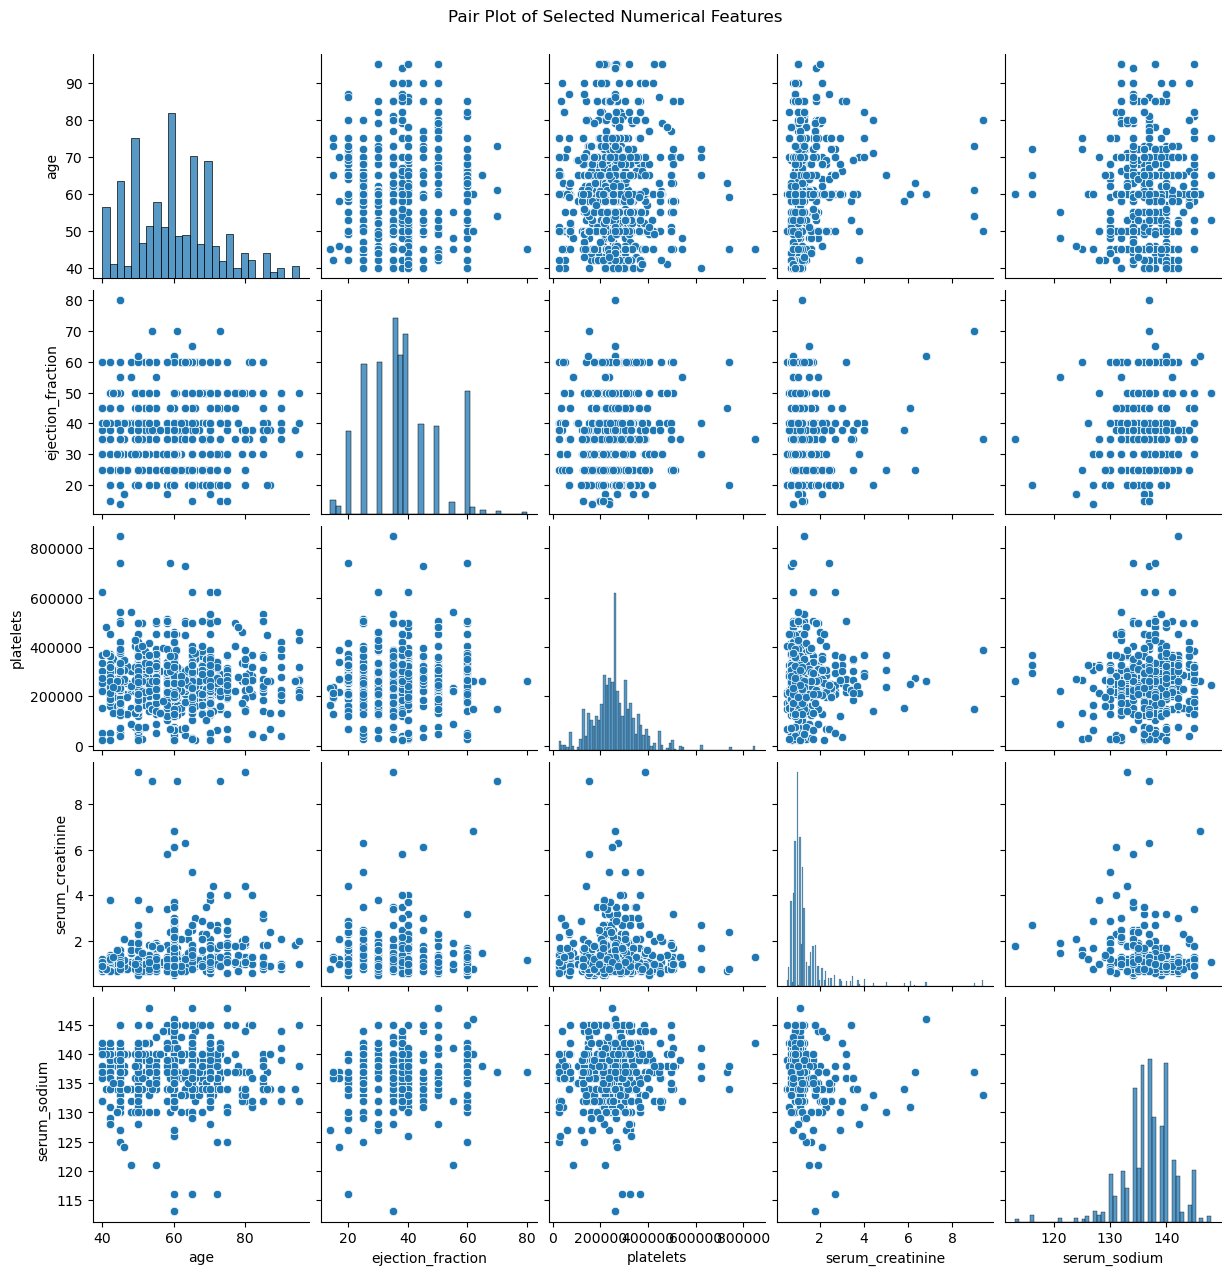

In [14]:
# Histogram/KDE plot for 'age'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot for 'diabetes'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='diabetes')
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

# Box plot for 'ejection_fraction' across 'DEATH_EVENT'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='DEATH_EVENT', y='ejection_fraction')
plt.title('Distribution of Ejection Fraction by Death Event')
plt.xlabel('Death Event')
plt.ylabel('Ejection Fraction')
plt.xticks([0, 1], ['Survived', 'Died'])
plt.show()

# Pair plot for selected numerical features
selected_features = ['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
sns.pairplot(data=df[selected_features])
plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
plt.show()

In [15]:
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, test_size = 0.2)

# Decision Tree

In [17]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 10)

In [18]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

In [19]:
y_pred_tree = tree.predict(X_test)

In [20]:
print('Accuracy is:'), accuracy_score(y_test, y_pred_tree)*100

Accuracy is:


(None, 90.4)

# SVM

In [21]:
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, test_size = 0.2)

In [23]:
svm = SVC(kernel = 'rbf', random_state = 51, gamma = 'scale', C = 1.0)

In [24]:
svm.fit(X_train, y_train)

SVC(random_state=51)

In [25]:
y_pred_svm = svm.predict(X_test)

In [26]:
y_pred_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
print('Accuracy is:'), accuracy_score(y_test, y_pred_svm)*100

Accuracy is:


(None, 69.69999999999999)

# Linear Regression

In [28]:
# lrg = LinearRegression()

In [29]:
# lrg.fit(X_train, y_train)

In [30]:
# y_pred_lrg = lrg.predict(X_test)

In [31]:
# y_pred_lrg 

In [32]:
# print('Accuracy is:'), accuracy_score(y_test, y_pred_lrg)*100

# K-Neigbours

In [33]:
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, test_size = 0.2)

In [35]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

4000
4000
1000
1000


In [36]:
np.sqrt(len(X_test))

31.622776601683793

In [37]:
# sc = StandardScaler()

In [38]:
# X_train = sc.fit(X_train)
# X_test = sc.fit(X_test)

In [39]:
knn = KNeighborsClassifier(n_neighbors = 15, metric = 'euclidean')

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [41]:
y_pred_knn = knn.predict(X_test)

In [42]:
print('Accuracy is:'),accuracy_score(y_test, y_pred_knn)*100

Accuracy is:


(None, 88.9)